#### 1. Daftar Dosen UPN Veteran X Angkatan 2022

Sajikanlah dataset berikut ke dalam bentuk diagram batang (bar chart), diagram garis (line chart),
diagram pencar (scatter chart), diagram lingkaran (pie chart), diagram area, atau diagram lainnya
yang cocok untuk merepresentasikan dataset. Lakukan praproses atau penyesuaian atribut/kolom
untuk memudahkan dalam penyajian dan mendapatkan insight yang bermakna.

In [48]:
import pandas as pd
from datetime import datetime
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


#### Kolom Asli

In [49]:
# Data yang akan dimasukkan ke dalam dataframe
data = {
    'Nomor': list(range(1, 21)),  # Nomor dosen
    'Tanggal Lahir': [
        '1 Mei 1993', '8 September 1992', '4 Agustus 1978', '1 Januari 1980', '16 April 1995',
        '19 Maret 1991', '23 November 1994', '25 Februari 1997', '20 Oktober 1991', '18 November 1997',
        '11 Mei 1992', '12 Juni 1982', '11 Juli 1979', '16 Agustus 1977', '2 November 1970',
        '8 Desember 1983', '22 Maret 1992', '10 April 1994', '12 Mei 1996', '11 April 1993'
    ],
    'Pendidikan Terakhir': [
        'S2 Terapan Teknik Informatika, Politeknik Elektronika Negeri Surabaya',
        'S2 Teknik Informatika, Institut Teknologi Sepuluh Nopember',
        'S3 Biomedical Engineering, University of Rome',
        'S3 Informatics, University of WDafashington',
        'S3 Biomedik, Institut Teknologi Sepuluh Nopember',
        'S3 Informatika, Universitas Telkom',
        'S2 Terapan Teknik Elektronika, Politeknik Elektronika Negeri Surabaya',
        'S1 Electronical Engineering, University of Manchester',
        'S3 Informatics, University of Nigeria',
        'S1 Biomedik, Universitas Indonesia',
        'S3 Teknik Elektro, Institut Teknologi Sepuluh Nopember',
        'Post-doctoral Biomedical Engineering, Pusan National University',
        'Post-doctoral Electronical Engineering, Hongkong University',
        'Post-doctoral Biomedical Engineering, Sydney University',
        'Post-doctoral Informatics, Institut Teknologi Bandung',
        'S3 Sistem Informasi, Institut Teknologi Sepuluh Nopember',
        'S2 Teknik Informatika, Universitas Padjadjaran',
        'S2 Teknik Elektro, Universitas Gadjah Mada',
        'S2 Teknik Biomedik, Universitas Airlangga',
        'S2 Teknik Informatika, Universitas Bina Darma'
    ]
}

df = pd.DataFrame(data)
df

,Nomor,Tanggal Lahir,Pendidikan Terakhir
0,1,1 Mei 1993,"S2 Terapan Teknik Informatika, Politeknik Elek..."
1,2,8 September 1992,"S2 Teknik Informatika, Institut Teknologi Sepu..."
2,3,4 Agustus 1978,"S3 Biomedical Engineering, University of Rome"
3,4,1 Januari 1980,"S3 Informatics, University of WDafashington"
4,5,16 April 1995,"S3 Biomedik, Institut Teknologi Sepuluh Nopember"
5,6,19 Maret 1991,"S3 Informatika, Universitas Telkom"
6,7,23 November 1994,"S2 Terapan Teknik Elektronika, Politeknik Elek..."
7,8,25 Februari 1997,"S1 Electronical Engineering, University of Man..."
8,9,20 Oktober 1991,"S3 Informatics, University of Nigeria"
9,10,18 November 1997,"S1 Biomedik, Universitas Indonesia"


#### Penyesuaian Kolom

In [50]:
df = pd.DataFrame(data)

# formatting tanggal
locale.setlocale(locale.LC_TIME, 'id_ID.UTF-8')
df['Tanggal Lahir'] = pd.to_datetime(df['Tanggal Lahir'], format='%d %B %Y', errors='coerce')

# jenjang pendidikan
df['Jenjang Pendidikan'] = df['Pendidikan Terakhir'].str.extract(r'(S\d|Post-doctoral)')[0]

# jumlah dosen per jenjang pendidikan
jumlah_dosen_per_jenjang = df['Jenjang Pendidikan'].value_counts().reset_index()
jumlah_dosen_per_jenjang.columns = ['Jenjang Pendidikan', 'Jumlah Dosen']

# bidang studi
df['Bidang Studi'] = df['Pendidikan Terakhir'].str.replace(r'(S\d|Post-doctoral)', '').str.split(',').str[0].str.strip()
df['Kampus'] = df['Pendidikan Terakhir'].str.replace(r'(S\d|Post-doctoral)', '').str.split(',').str[1].str.strip()

df['Usia Sekarang'] = (datetime.now() - df['Tanggal Lahir']).astype('<m8[Y]')

# range umur
bins = [0, 30, 40, 50, 60, 70, float('inf')]
labels = ['<30', '30-40', '41-50', '51-60', '61-70', '70+']
df['Rentang Umur'] = pd.cut(df['Usia Sekarang'], bins=bins, labels=labels)

# Menghapus kolom-kolom yang tidak diperlukan
df = df.drop(columns=['Nomor', 'Pendidikan Terakhir'])
df

C:\Users\ariw1\AppData\Local\Temp\ipykernel_1144\1217421857.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Bidang Studi'] = df['Pendidikan Terakhir'].str.replace(r'(S\d|Post-doctoral)', '').str.split(',').str[0].str.strip()
C:\Users\ariw1\AppData\Local\Temp\ipykernel_1144\1217421857.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Kampus'] = df['Pendidikan Terakhir'].str.replace(r'(S\d|Post-doctoral)', '').str.split(',').str[1].str.strip()


,Tanggal Lahir,Jenjang Pendidikan,Bidang Studi,Kampus,Usia Sekarang,Rentang Umur
0,1993-05-01,S2,Terapan Teknik Informatika,Politeknik Elektronika Negeri Surabaya,30.0,<30
1,1992-09-08,S2,Teknik Informatika,Institut Teknologi Sepuluh Nopember,31.0,30-40
2,1978-08-04,S3,Biomedical Engineering,University of Rome,45.0,41-50
3,1980-01-01,S3,Informatics,University of WDafashington,43.0,41-50
4,1995-04-16,S3,Biomedik,Institut Teknologi Sepuluh Nopember,28.0,<30
5,1991-03-19,S3,Informatika,Universitas Telkom,32.0,30-40
6,1994-11-23,S2,Terapan Teknik Elektronika,Politeknik Elektronika Negeri Surabaya,28.0,<30
7,1997-02-25,S1,Electronical Engineering,University of Manchester,26.0,<30
8,1991-10-20,S3,Informatics,University of Nigeria,31.0,30-40
9,1997-11-18,S1,Biomedik,Universitas Indonesia,25.0,<30


### Visualisasi

<Figure size 720x432 with 0 Axes>

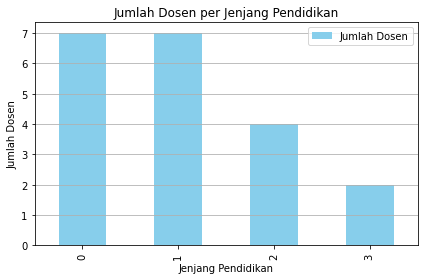

Jumlah Dosen per Jenjang Pendidikan:
+---+--------------------+--------------+
|   | Jenjang Pendidikan | Jumlah Dosen |
+---+--------------------+--------------+
| 0 |         S2         |      7       |
| 1 |         S3         |      7       |
| 2 |   Post-doctoral    |      4       |
| 3 |         S1         |      2       |
+---+--------------------+--------------+


In [51]:
# Membuat bar chart
plt.figure(figsize=(10, 6))
jumlah_dosen_per_jenjang.plot(kind='bar', color='skyblue')
plt.title('Jumlah Dosen per Jenjang Pendidikan')
plt.xlabel('Jenjang Pendidikan')
plt.ylabel('Jumlah Dosen')
plt.grid(axis='y')

# visualisasi
plt.tight_layout()
plt.show()

# format tabel
print("Jumlah Dosen per Jenjang Pendidikan:")
print(tabulate(jumlah_dosen_per_jenjang.reset_index(), headers=['Jenjang Pendidikan', 'Jumlah Dosen'], tablefmt='pretty', showindex=False))

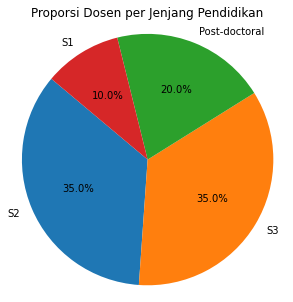

In [57]:
jumlah_dosen_per_jenjang = df['Jenjang Pendidikan'].value_counts()

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(jumlah_dosen_per_jenjang, labels=jumlah_dosen_per_jenjang.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Dosen per Jenjang Pendidikan')
plt.axis('equal')

# Tampilkan visualisasi tanpa slide diagram
plt.show()


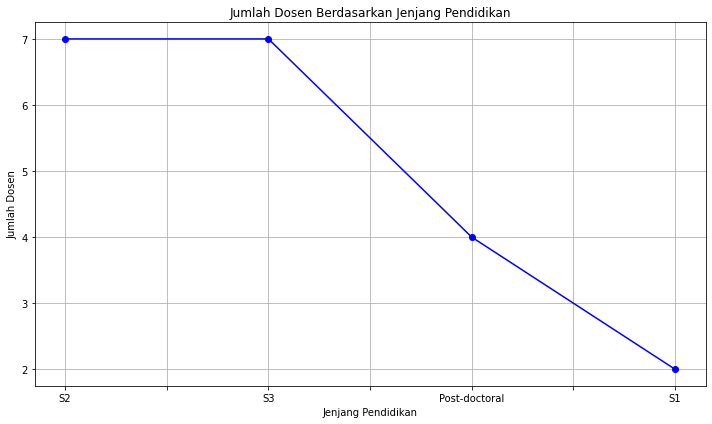

In [28]:
# Membuat line chart
plt.figure(figsize=(10, 6))
jumlah_dosen_per_jenjang.plot(kind='line', marker='o', color='blue')
plt.title('Jumlah Dosen Berdasarkan Jenjang Pendidikan')
plt.xlabel('Jenjang Pendidikan')
plt.ylabel('Jumlah Dosen')
plt.grid(True)

# tampilkan visualisasi
plt.tight_layout()
plt.show()

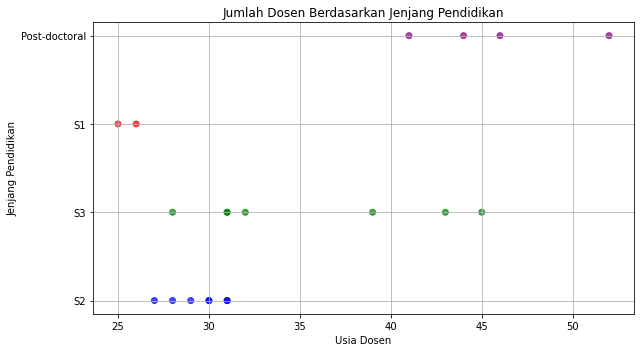

In [58]:
# Membuat scatter plot
plt.figure(figsize=(9, 5))
colors = {'S1': 'red', 'S2': 'blue', 'S3': 'green', 'Post-doctoral': 'purple'}
plt.scatter(df['Usia Sekarang'], df['Jenjang Pendidikan'], c=df['Jenjang Pendidikan'].map(colors), marker='o', alpha=0.7)
plt.title('Jumlah Dosen Berdasarkan Jenjang Pendidikan')
plt.xlabel('Usia Dosen')
plt.ylabel('Jenjang Pendidikan')
plt.grid(True)

# tampilkan visualisasi
plt.tight_layout()
plt.show()

### Daftar Pasien Diabetes Berdasarkan Faktor Gula Darah, Berat Badan, dan   Tinggi Badan

Catatan: Tentukan terlebih dahulu apakah berat badan dikategorikan kurang (underweight),
normal, berat badan berlebih (overweight) atau berat badan sangat berlebih (obesitas)
berdasarkan parameter yang ada

In [61]:
import pandas as pd 

# Data pasien
data = {
    'Tinggi Badan (cm)': [165, 150, 154, 149, 166, 156, 148, 154, 163, 152, 166, 151, 150, 146, 163, 151, 146, 156, 160, 147],
    'Berat Badan (kg)': [50, 95, 52, 43, 96, 67, 42, 64, 74, 98, 51, 96, 48, 40, 93, 61, 40, 66, 71, 95],
    'Gula Darah (Puasa)': [4.9, 5.7, 4.5, 8.14, 8.05, 4.2, 8.14, 4.89, 5.08, 5.6, 4.7, 5.8, 4.3, 8.19, 8.08, 4.3, 8.10, 4.92, 5.05, 5.3]
}

# Membuat dataframe
df = pd.DataFrame(data)

# Menghitung BMI
df['BMI'] = df['Berat Badan (kg)'] / ((df['Tinggi Badan (cm)'] / 100) ** 2)

# Kategorikan berat badan dan analisis gula darah
def kategorikan_dan_analisis(row):
    bmi = row['BMI']
    gula_darah = row['Gula Darah (Puasa)']
    
    if bmi < 18.5:
        berat_badan = 'Kurang (Underweight)'
    elif 18.5 <= bmi < 24.9:
        berat_badan = 'Normal'
    elif 25 <= bmi < 29.9:
        berat_badan = 'Berat Badan Berlebih (Overweight)'
    else:
        berat_badan = 'Obesitas'

    if gula_darah >= 5.6:
        analisis_gula = 'Diabetes'
    elif 5.6 > gula_darah >= 4.0:
        analisis_gula = 'Prediabetes'
    else:
        analisis_gula = 'Normal Gula Darah'
    
    return pd.Series([berat_badan, analisis_gula], index=['Kategori Berat Badan', 'Analisis Gula Darah'])

df[['Kategori Berat Badan', 'Analisis Gula Darah']] = df.apply(kategorikan_dan_analisis, axis=1)

# Menampilkan hasil analisis
(df[['Tinggi Badan (cm)', 'Berat Badan (kg)', 'Gula Darah (Puasa)', 'BMI', 'Kategori Berat Badan', 'Analisis Gula Darah']])


,Tinggi Badan (cm),Berat Badan (kg),Gula Darah (Puasa),BMI,Kategori Berat Badan,Analisis Gula Darah
0,165,50,4.90,18.365473,Kurang (Underweight),Prediabetes
1,150,95,5.70,42.222222,Obesitas,Diabetes
2,154,52,4.50,21.926126,Normal,Prediabetes
3,149,43,8.14,19.368497,Normal,Diabetes
4,166,96,8.05,34.838148,Obesitas,Diabetes
5,156,67,4.20,27.531229,Berat Badan Berlebih (Overweight),Prediabetes
6,148,42,8.14,19.174580,Normal,Diabetes
7,154,64,4.89,26.986001,Berat Badan Berlebih (Overweight),Prediabetes
8,163,74,5.08,27.852008,Berat Badan Berlebih (Overweight),Prediabetes
9,152,98,5.60,42.416898,Obesitas,Diabetes


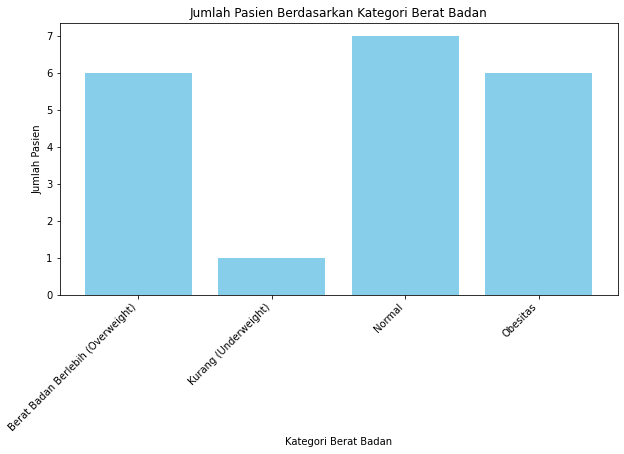

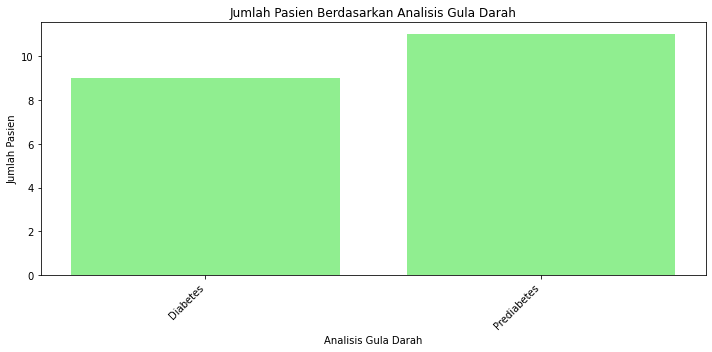

In [62]:
# Menghitung jumlah setiap kategori berat badan
jumlah_berat_badan = df['Kategori Berat Badan'].value_counts().sort_index()

# Menghitung jumlah setiap analisis gula darah
jumlah_gula_darah = df['Analisis Gula Darah'].value_counts().sort_index()

# visualisasi berat badan
plt.figure(figsize=(10, 5))
plt.bar(jumlah_berat_badan.index, jumlah_berat_badan, color='skyblue')
plt.title('Jumlah Pasien Berdasarkan Kategori Berat Badan')
plt.xlabel('Kategori Berat Badan')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=45, ha='right')

# visualisasi gula darah
plt.figure(figsize=(10, 5))
plt.bar(jumlah_gula_darah.index, jumlah_gula_darah, color='lightgreen')
plt.title('Jumlah Pasien Berdasarkan Analisis Gula Darah')
plt.xlabel('Analisis Gula Darah')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


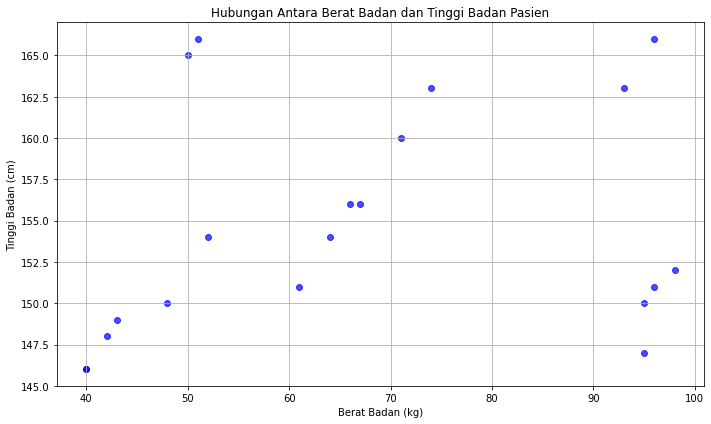

In [63]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Berat Badan (kg)'], df['Tinggi Badan (cm)'], c='blue', marker='o', alpha=0.7)
plt.title('Hubungan Antara Berat Badan dan Tinggi Badan Pasien')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Tinggi Badan (cm)')
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

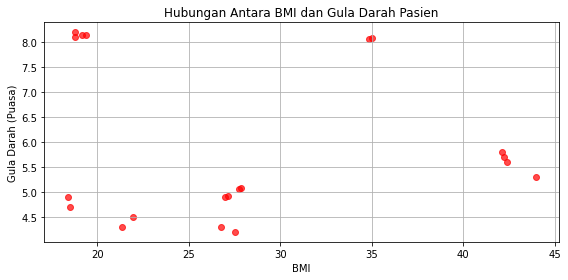

In [66]:
# Membuat scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(df['BMI'], df['Gula Darah (Puasa)'], c='red', marker='o', alpha=0.7)
plt.title('Hubungan Antara BMI dan Gula Darah Pasien')
plt.xlabel('BMI')
plt.ylabel('Gula Darah (Puasa)')
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

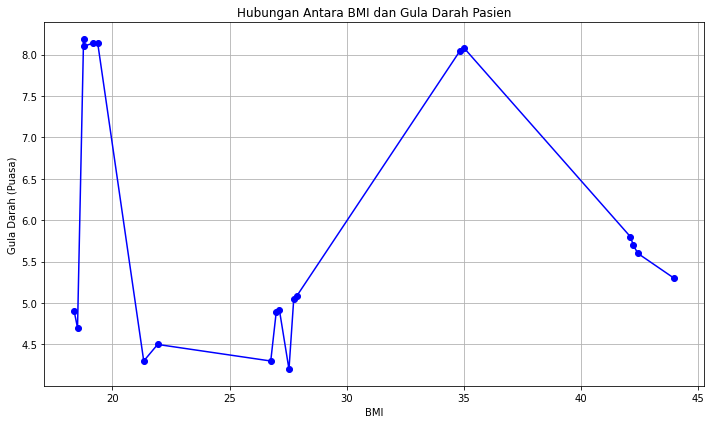

In [34]:
import matplotlib.pyplot as plt

# Urutkan DataFrame berdasarkan BMI
df_sorted = df.sort_values(by='BMI')

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['BMI'], df_sorted['Gula Darah (Puasa)'], marker='o', linestyle='-', color='blue', markersize=6)
plt.title('Hubungan Antara BMI dan Gula Darah Pasien')
plt.xlabel('BMI')
plt.ylabel('Gula Darah (Puasa)')
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


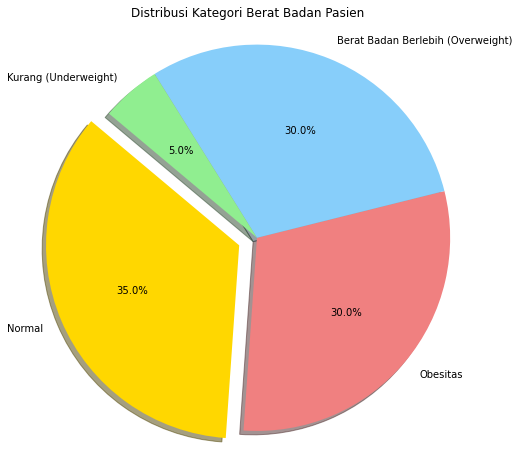

In [35]:
# Hitung jumlah pasien dalam setiap kategori berat badan
kategori_count = df['Kategori Berat Badan'].value_counts()

# Siapkan data untuk pie chart
labels = kategori_count.index
sizes = kategori_count.values
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0, 0) 

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribusi Kategori Berat Badan Pasien')

# Menampilkan pie chart
plt.axis('equal')
plt.show()

### 3. Daftar Kasus Pasien Terkonfirmasi Covid-19 Harian

Catatan: Hitung terlebih dahulu pertumbuhan kasus Covid-19 harian

In [36]:
import pandas as pd

# Data jumlah kasus terkonfirmasi COVID-19 harian
data = {
    'Tanggal': [
        '02-Mar-20', '03-Mar-20', '04-Mar-20', '05-Mar-20', '06-Mar-20', '07-Mar-20',
        '08-Mar-20', '09-Mar-20', '10-Mar-20', '11-Mar-20', '12-Mar-20', '13-Mar-20',
        '14-Mar-20', '15-Mar-20', '16-Mar-20', '17-Mar-20', '18-Mar-20', '19-Mar-20',
        '20-Mar-20', '21-Mar-20', '22-Mar-20', '23-Mar-20', '24-Mar-20', '25-Mar-20',
        '26-Mar-20', '27-Mar-20', '28-Mar-20', '29-Mar-20', '30-Mar-20', '31-Mar-20'
    ],
    'Jumlah Kasus Terkonfirmasi': [
        2, 0, 0, 0, 2, 0, 2, 13, 8, 7, 0, 35, 27, 21, 17, 38, 55, 82, 60, 81, 64, 65, 106,
        105, 103, 153, 109, 130, 129, 114
    ]
}

# Membuat DataFrame
df = pd.DataFrame(data)

In [37]:
# Menghitung pertumbuhan harian
df['Pertumbuhan Harian'] = df['Jumlah Kasus Terkonfirmasi'].diff().fillna(0)

# Menampilkan hasil
(df[['Tanggal', 'Jumlah Kasus Terkonfirmasi', 'Pertumbuhan Harian']])

,Tanggal,Jumlah Kasus Terkonfirmasi,Pertumbuhan Harian
0,02-Mar-20,2,0.0
1,03-Mar-20,0,-2.0
2,04-Mar-20,0,0.0
3,05-Mar-20,0,0.0
4,06-Mar-20,2,2.0
5,07-Mar-20,0,-2.0
6,08-Mar-20,2,2.0
7,09-Mar-20,13,11.0
8,10-Mar-20,8,-5.0
9,11-Mar-20,7,-1.0


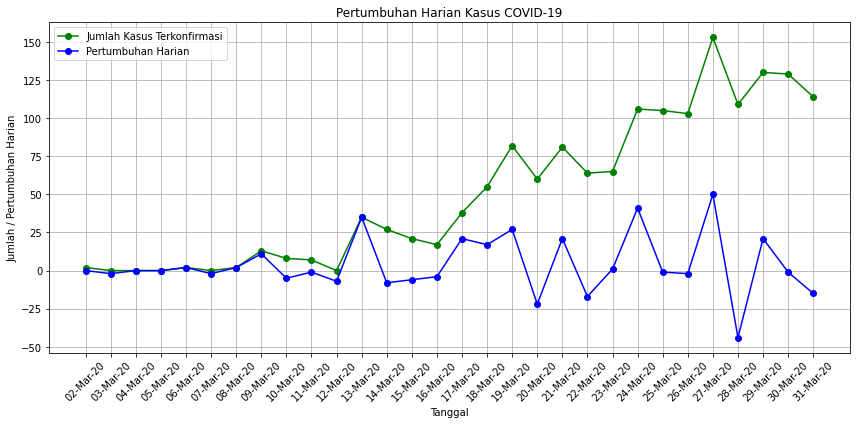

In [38]:
# Membuat line chart
plt.figure(figsize=(12, 6))

# Menampilkan jumlah kasus terkonfirmasi
plt.plot(df['Tanggal'], df['Jumlah Kasus Terkonfirmasi'], marker='o', linestyle='-', color='green', markersize=6, label='Jumlah Kasus Terkonfirmasi')

# Menampilkan pertumbuhan harian
plt.plot(df['Tanggal'], df['Pertumbuhan Harian'], marker='o', linestyle='-', color='blue', markersize=6, label='Pertumbuhan Harian')

plt.title('Pertumbuhan Harian Kasus COVID-19')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah / Pertumbuhan Harian')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Menampilkan line chart
plt.tight_layout()
plt.show()
